## Library ##

In [1]:
install.packages("gdata")

Installing package into 'C:/Users/carlo/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'gtools'




package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\carlo\AppData\Local\Temp\RtmpaO7M9E\downloaded_packages


In [2]:
install.packages("mice")

Installing package into 'C:/Users/carlo/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'minqa', 'nloptr', 'ucminf', 'numDeriv', 'iterators', 'lme4', 'ordinal', 'foreach', 'shape', 'RcppEigen', 'pan', 'jomo', 'glmnet', 'mitml'




package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'ucminf' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'ordinal' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'pan' successfully unpacked and MD5 sums checked
package 'jomo' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked
package 'mitml' successfully unpacked and MD5 sums checked
package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\carlo\AppData\Local\Temp\RtmpaO7M9E\downloaded_packag

In [3]:
install.packages("mltools")

Installing package into 'C:/Users/carlo/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'mltools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\carlo\AppData\Local\Temp\RtmpaO7M9E\downloaded_packages


In [4]:
install.packages("VIM")

Installing package into 'C:/Users/carlo/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'cowplot', 'Deriv', 'microbenchmark', 'doBy', 'SparseM', 'MatrixModels', 'zoo', 'carData', 'abind', 'pbkrtest', 'quantreg', 'DEoptimR', 'lmtest', 'proxy', 'car', 'robustbase', 'sp', 'vcd', 'e1071', 'laeken', 'ranger'




package 'cowplot' successfully unpacked and MD5 sums checked
package 'Deriv' successfully unpacked and MD5 sums checked
package 'microbenchmark' successfully unpacked and MD5 sums checked
package 'doBy' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'DEoptimR' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked
package 'robustbase' successfully unpacked and MD5 sums checked
package 'sp' successfull

In [4]:
library(tidyverse)
library(VIM)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'VIM' was built under R version 4.4.2"
Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep




In [6]:
suppressPackageStartupMessages(require(gdata))
suppressPackageStartupMessages(require(mice))
suppressPackageStartupMessages(require(mltools))

imputeMean <- function(df, args_list = NULL){
  df <- data.frame(df)
  df_imp <- df
  vars_real <- colnames(df)[sapply(df, is.numeric)]
  vars_factor <- colnames(df)[!sapply(df, is.numeric)]

  if (length(vars_real) >0){
    if (length(vars_real)>1){
      mean_real <- sapply(df[,vars_real], mean, na.rm=T)
    } else {
      mean_real <- c(mean(df[,vars_real], na.rm=T))
    }
    df_imp[ , vars_real] <- sapply(1:length(vars_real),
                                   function(x) ifelse(is.na(df_imp[,vars_real[x]]), mean_real[x], df_imp[,vars_real[x]]))
  }

  if (length(vars_factor) > 0 ){
    fact.levels <- sapply(vars_factor, FUN=function(x) levels(df[,x]))
    mode_factor <- as.vector(apply(data.frame(df[, vars_factor]), MARGIN=2,
                                   FUN = function(x) as.data.frame(table(x))[which.max(table(x)),1]))
    df_imp[ , vars_factor] <- sapply(1:length(vars_factor),
                                     function(x) ifelse(is.na(df_imp[,vars_factor[x]]), mode_factor[x], as.character(df_imp[,vars_factor[x]])))
    for (i in 1:length(vars_factor)){
      df_imp[,vars_factor[i]] <- as.factor(df_imp[,vars_factor[i]])
      levels(df_imp[,vars_factor[i]]) <- levels(df[,vars_factor[i]])
    }
  }
  return(df_imp)
}

threshold <- function(MD_patterns){
  #DO
  #How to deal with the weight threshold?
    #between 5 to 10% - we take the x largest
  #below 5% - we sample them at random
}

logit.bypatterns <- function(data,patterns,mechanism){
  logit.weights <- matrix(rep(0,times=(nrow(patterns)*ncol(data))),nrow=nrow(patterns))

  #we have to replace the missing data to prevent these cases to be deleted
  meandata <- as.data.frame(imputeMean(data))


  for (i in seq_len(nrow(patterns))){

    newcol <- rep(0,times=nrow(data))

    #checking which individuals have this pattern of missingness:
    #code from stackoverflow
    patternrows <- which(apply(apply(!is.na(data),1,function(x) x==patterns[i,]),2,function(x) sum(x)==length(x)))
    #end of code copied from stackoverflow

    newcol[patternrows] <- 1

    variablesmissing <- which(patterns[i,]==0)

    subdata <- cbind(meandata[,-variablesmissing],"newcol"=newcol)


    if (length(unique(newcol))==1){
      logit.weights[i,-variablesmissing] <- 1/ncol(logit.weights)
    } else {
      if (nrow(subdata) >= ncol(subdata)-1){
        logit.weights[i,-variablesmissing] <- glm(newcol ~ ., data = subdata, family = binomial)$coefficients[-1]

    } else {
        x <- model.matrix(~.-1, data = subdata[, 1:(ncol(subdata)-1)])
        cv.fit <- NULL
        try(cv.fit <- glmnet::cv.glmnet(x=x,
                                        y=subdata$newcol, alpha = 0,
                                        family = "binomial"), silent = T)
        if (is.null(cv.fit)){
          lambda.max <- max(svd(x)$d)
          lambda <- runif(1, 0.2, 0.8)*lambda.max
        } else {
          lambda <- cv.fit$lambda.min
        }
        glm_mod <- NULL
        try(glm_mod <- glmnet::glmnet(x=x, y=subdata$newcol, alpha = 0, family = "binomial",
                                      lambda = lambda), silent = T)
        if (!is.null(glm_mod)){
          coefs <- as.vector(glm_mod$beta)
        } else {
          coefs <- LiblineaR::LiblineaR(x, subdata$newcol, type=0)$W[1:ncol(x)]
        }
        logit.weights[i,-variablesmissing] <- coefs
      }
    }


    if(mechanism=="MNAR"){

      logit.weights[i,variablesmissing] = mean(logit.weights[i,-variablesmissing])

    }
  }
  return(logit.weights)
}

#' generation of missing values on complete or incomplete data
#' according to different missingness mechanisms and patterns
#'
#' @param data [data.frame, matrix] (mixed) data table (n x p)
#' @param mechanism [string] either one of "MCAR", "MAR", "MNAR"; default is "MCAR"
#' @param self.mask [string] either NULL or one of "sym", "upper", "lower"; default is NULL
#' @param perc.missing [positive double] proportion of missing values, between 0 and 1; default is 0.5
#' @param idx.incomplete [array] indices of variables to generate missing values for; if NULL then missing values in all variables are possible; default is NULL
#' @param idx.covariates [matrix] binary matrix such that entries in row i that are equal to 1 indicate covariates that incluence missingness of variable i (sum(idx.incomplete) x p); if NULL then all covariates contribute; default is NULL
#' @param weights.covariates [matrix] matrix of same size as idx.covariates with weights in row i for contribution of each covariate to missingness model of variable i; if NULL then a (regularized) logistic model is fitted; default is NULL
#' @param by.patterns [boolean] generate missing values according to (pre-specified) patterns; default is FALSE
#' @param patterns [matrix] binary matrix with 1=observed, 0=missing (n_pattern x p); default is NULL
#' @param freq.patterns [array] array of size n_pattern containing desired proportion of each pattern; if NULL then mice::ampute.default.freq will be called ; default is NULL
#' @param weights.patterns [matrix] weights used to calculate weighted sum scores (n_pattern x p); if NULL then mice::ampute.default.weights will be called; default is NULL
#' @param use.all [boolean] use all observations, including incomplete observations, for amputation when amputing by patterns (only relevant if initial data is incomplete and by.pattern=T); default is FALSE
#' @param logit.model [string] either one of "RIGHT","LEFT","MID","TAIL"; default is "RIGHT"
#' @param seed [natural integer] seed for random numbers generator; default is NULL
#'
#' @return A list with the following elements
#' \item{data.init}{original data.frame}
#' \item{data.incomp}{data.frame with the newly generated missing values, observed values correspond to the values from the initial data.frame}
#' \item{idx_newNA}{a boolean data.frame indicating the indices of the newly generated missing values}
#'
#' @export
#' @import mice mltools gdata LiblineaR glmnet dplyr
produce_NA <- function(data,
                       mechanism = "MCAR", #c("MCAR", "MAR", "MNAR"),
                       perc.missing = 0.5,
                       self.mask = NULL, #c("sym","upper","lower")
                       idx.incomplete = NULL,
                       idx.covariates = NULL,
                       weights.covariates = NULL,
                       by.patterns = FALSE,
                       patterns = NULL,
                       freq.patterns = NULL,
                       weights.patterns = NULL,
                       use.all = FALSE,
                       logit.model = "RIGHT",#c("RIGHT","LEFT","MID","TAIL")
                       seed = NULL)
  {

  if (!is.null(seed)){
    set.seed(seed)
  }

  stopifnot((mechanism == "MCAR" & !(is.null(perc.missing))) |
                (mechanism %in% c("MAR", "MNAR")))

  if (is.matrix(data)) {
    data <- data.frame(data)
  }

  if (!is.null(self.mask)){
    self.mask <- tolower(self.mask)
  }

  if (mechanism == "MCAR") {
    return(produce_MCAR(data, perc.missing, idx.incomplete))
  } else {

    # temporary fix to handle factors
    # (transform them to numeric and revert the conversion in the end)
    orig.data <- data
    vars_factor <- colnames(data)[!sapply(data, is.numeric)]
    if (length(vars_factor)==1){
      levels_factor <- list(gdata::mapLevels(x=data[,vars_factor]))
    }
    if (length(vars_factor)>1){
      levels_factor <- sapply(data[,vars_factor], FUN = function(x) gdata::mapLevels(x=x))
    }
    data[,vars_factor] <- sapply(data[,vars_factor], as.integer)
    data <- as.data.frame(data)


    # end temporary fix

    #check if there are non-numeric variables
    # if (any(vapply(data, function(x) !(is.numeric(x) | is.factor(x)), logical(1)))) {
    #  data <- as.data.frame(sapply(data, as.numeric))
    # }

    if (by.patterns==TRUE) {

      if(is.null(patterns)){
        if(sum(is.na(data))==0){
          patterns <- mice::ampute.default.patterns(length(data[1,]))
          weights.patterns <- mice::ampute.default.weights(patterns,mechanism)
          freq.patterns <- mice::ampute.default.freq(patterns)
          #check if there are categorical variables
          if (sum(sapply(data, FUN=is.factor))!= 0){
            for (i in which(sapply(data, FUN=is.factor))){
              half1 <- patterns[,1:i]
              half2 <- patterns[,(i+1):length(patterns[1,])]
              patterns <- cbind(half1, matrix(rep(patterns[,i],times=length(levels(as.factor(data[,i])))-1),ncol=length(levels(as.factor(data[,i])))-1, byrow=FALSE),half2)

              half1 <- weights.patterns[,1:i]
              half2 <- weights.patterns[,(i+1):length(weights.patterns[1,])]
              weights.patterns <- cbind(half1, matrix(rep(weights.patterns[,i],times=length(levels(as.factor(data[,i])))-1),ncol=length(levels(as.factor(data[,i])))-1,byrow=FALSE),half2)
              data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
            }
          }
        }else{

          if (sum(sapply(data, FUN=is.factor))!= 0){
            data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
          }


          #Code taken from miss.compare package, accessed: May 10
          MD_patterns <- mice::md.pattern(data, plot = F)
          data_names <- colnames(data)
          MD_patterns <- MD_patterns[, data_names]
          MD_patterns <- MD_patterns[-c(1, nrow(MD_patterns)), ]
          index <- as.numeric(rownames(MD_patterns)) >= 0.05*sum(apply(is.na(data),1,function(x) sum(x)>=1))
          patterns <- MD_patterns[index, ]

          if (is.null(rownames(patterns))) {
            freq.patterns <- 1
          } else {
            totrows <- as.numeric(rownames(patterns))
            freq.patterns <- totrows/sum(totrows)
          }
          # End of code taken from miss.compare package, accessed: May 10

          if (is.null(dim(patterns))){
            patterns <- matrix(patterns,nrow = 1)
          }
          weights.patterns <- logit.bypatterns(data,patterns,mechanism) #this will deal with categorical variables internally


        }

      }
      else{
        if(is.null(weights.patterns)){
          if(sum(is.na(data))==0){
            weights.patterns  <- mice::ampute.default.weights(patterns,mechanism)

            if (sum(sapply(data, FUN=is.factor))!= 0){

              if(length(patterns[1,])==length(data[1,])){
                for (i in which(sapply(data, FUN=is.factor))){

                  half1 <- patterns[,1:i]
                  half2 <- patterns[,(i+1):length(patterns[1,])]
                  patterns <- cbind(half1, matrix(rep(patterns[,i],times=length(levels(as.factor(data[,i])))-1),ncol =length(levels(as.factor(data[,i])))-1, byrow=FALSE),half2)

                  half1 <- weights.patterns[,1:i]
                  half2 <- weights.patterns[,(i+1):length(weights.patterns[1,])]
                  weights.patterns <- cbind(half1, matrix(rep(weights.patterns[,i],times=length(levels(as.factor(data[,i])))-1),ncol=length(levels(as.factor(data[,i])))-1,byrow=FALSE),half2)
                  data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
                }
              }
              data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
            }

          }else{
            if (sum(sapply(data, FUN=is.factor))!= 0){
              if(length(patterns[1,])==length(data[1,])){
                for (i in which(sapply(data, FUN=is.factor))){

                  half1 <- patterns[,1:i]
                  half2 <- patterns[,(i+1):length(patterns[1,])]
                  patterns <- cbind(half1, matrix(rep(patterns[,i],times=length(levels(as.factor(data[,i])))-1), ncol = length(levels(as.factor(data[,i])))-1, byrow=FALSE),half2)
                }
              }
              data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
            }
            weights.patterns <- logit.bypatterns(data,patterns,mechanism)
          }
        }

        if(is.null(freq.patterns)){
          if(sum(is.na(data))==0){

            freq.patterns <- mice::ampute.default.freq(patterns)

            if (sum(sapply(data, FUN=is.factor))!= 0){
              if(length(patterns[1,])==length(data[1,])){
                for (i in which(sapply(data, FUN=is.factor))){

                  half1 <- patterns[,1:i]
                  half2 <- patterns[,(i+1):length(patterns[1,])]
                  patterns <- cbind(half1, matrix(rep(patterns[,i],times=length(levels(as.factor(data[,i])))-1),ncol = length(levels(as.factor(data[,i])))-1, byrow=FALSE),half2)

                  half1 <- weights.patterns[,1:i]
                  half2 <- weights.patterns[,(i+1):length(weights.patterns[1,])]
                  weights.patterns <- cbind(half1, matrix(rep(weights.patterns[,i],times=length(levels(as.factor(data[,i])))-1),ncol=length(levels(as.factor(data[,i])))-1,byrow=FALSE),half2)
                  data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
                }
              }
              data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
            }
            #perc.missing <- perc.missing / sum(apply(patterns, 1, FUN = function(x) sum(x==0))*freq.patterns)
          }else{

            if (sum(sapply(data, FUN=is.factor))!= 0){
              if(length(patterns[1,])==length(data[1,])){
                for (i in which(sapply(data, FUN=is.factor))){

                  half1 <- patterns[,1:i]
                  half2 <- patterns[,(i+1):length(patterns[1,])]
                  patterns <- cbind(half1, matrix(rep(patterns[,i],times=length(levels(as.factor(data[,i])))-1),ncol = length(levels(as.factor(data[,i])))-1, byrow=FALSE),half2)

                  half1 <- weights.patterns[,1:i]
                  half2 <- weights.patterns[,(i+1):length(weights.patterns[1,])]
                  weights.patterns <- cbind(half1, matrix(rep(weights.patterns[,i],times=length(levels(as.factor(data[,i])))-1),ncol=length(levels(as.factor(data[,i])))-1,byrow=FALSE),half2)
                  data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
                }
              }

              data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))

            }

            MD_patterns <- mice::md.pattern(data, plot = F)
            data_names <- colnames(data)
            MD_patterns <- MD_patterns[, data_names]
            MD_patterns <- MD_patterns[-c(1, nrow(MD_patterns)), ]


            ##copied from stackoverflow (https://stackoverflow.com/questions/41779719/find-rows-of-matrix-which-contain-rows-of-another-matrix)
            ind <- match(MD_patterns, patterns)
            rows <- ind %% nrow(patterns)
            m <- matrix(rows, nrow = nrow(MD_patterns))
            matchRows <- apply(m, 1, duplicated, incomparables = NA)
            patternsrows <- which(colSums(matchRows)==ncol(patterns)-1)

            totrows <- as.numeric(rownames(MD_patterns[patternsrows,]))
            freq.patterns <- totrows/sum(totrows)

            #perc.missing <- perc.missing / sum(apply(patterns, 1, FUN = function(x) sum(x==0))*freq.patterns)
          }
        }

      }

      if (!use.all){
        complete_data <- data[apply(is.na(data),1,function(x) (sum(x)>=1)==0),]

        incomplete_data <- data[apply(is.na(data),1,function(x) (sum(x)>=1)>=1),]
        perc.missing <- (perc.missing - dplyr::if_else(nrow(incomplete_data)==0, 0, mean(is.na(incomplete_data)))*nrow(incomplete_data)/nrow(orig.data)) * nrow(orig.data)/nrow(complete_data)

        idx.patterns.var <- which(apply(patterns, 2, function(x) sum(x==0)>0))
        perc.missing <- perc.missing  / sum(apply(patterns, 1, FUN = function(x) sum(x==0))*freq.patterns) * (length(idx.patterns.var)/ncol(orig.data))

        amputed <- mice::ampute(complete_data, prop = perc.missing,
                                patterns = patterns,freq=freq.patterns,
                                mech = mechanism, weights = weights.patterns,
                                type = logit.model, bycases = FALSE)

        tmp <- amputed$amp
        if (length(vars_factor) > 0){
          for (i in 1:length(vars_factor)){
            data[,vars_factor[[i]]] <- as.factor(data[,vars_factor[[i]]])
            complete_data[,vars_factor[[i]]] <- as.factor(complete_data[,vars_factor[[i]]])
            incomplete_data[,vars_factor[[i]]] <- as.factor(incomplete_data[,vars_factor[[i]]])
            tmp[,vars_factor[[i]]] <- as.factor(tmp[,vars_factor[[i]]])

            gdata::mapLevels(x=data[,vars_factor[[i]]]) <- levels_factor[[i]]
            gdata::mapLevels(x=tmp[,vars_factor[[i]]]) <- levels_factor[[i]]
            gdata::mapLevels(x=complete_data[,vars_factor[[i]]]) <- levels_factor[[i]]
            gdata::mapLevels(x=incomplete_data[,vars_factor[[i]]]) <- levels_factor[[i]]
          }
        }
        idx_newNA <- matrix(rep(FALSE, prod(dim(incomplete_data))), nrow = nrow(incomplete_data), ncol = ncol(incomplete_data))

        idx_newNA <- rbind(idx_newNA, is.na(tmp))
        data.incomp <- rbind(incomplete_data, tmp)

      }
      if (use.all) {
        idx.patterns.var <- which(apply(patterns, 2, function(x) sum(x==0)>0))
        perc.missing <- perc.missing  / sum(apply(patterns, 1, FUN = function(x) sum(x==0))*freq.patterns)

        not.missing <- as.data.frame(imputeMean(data))
        idx_newNA <- matrix(rep(FALSE, prod(dim(orig.data))), nrow = nrow(orig.data), ncol = ncol(orig.data))

        if (sum(sapply(data, FUN=is.factor))!= 0){
          data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
          not.missing <- data.frame(mltools::one_hot(data.table::as.data.table(not.missing)))
        }

        not.missing <- as.matrix(not.missing)
        amputed <- mice::ampute(not.missing, prop = perc.missing*mean(!is.na(orig.data)),
                                patterns = patterns,freq=freq.patterns,
                                mech = mechanism, weights = weights.patterns,
                                type = logit.model, bycases = FALSE)
        data.incomp <- amputed$amp
        if (length(vars_factor) > 0){
          for (i in 1:length(vars_factor)){
            data[,vars_factor[[i]]] <- as.factor(data[,vars_factor[[i]]])
            data.incomp[,vars_factor[[i]]] <- as.factor(data.incomp[,vars_factor[[i]]])

            gdata::mapLevels(x=data[,vars_factor[[i]]]) <- levels_factor[[i]]
            gdata::mapLevels(x=data.incomp[,vars_factor[[i]]]) <- levels_factor[[i]]
          }
        }

        idx_newNA <- pmax(idx_newNA, as.matrix(is.na(data.incomp)))
        idx_newNA <- apply(idx_newNA, c(1,2), as.logical)
        data.incomp[is.na(data)] <- NA #re-storing original missing data

      }



      return(list("data.init" = data,
              "data.incomp" = data.incomp,
              "idx_newNA" = idx_newNA))


    } else{ #by.patterns==FALSE

      #code adapted from mice package, accessed: May 10
      if (!is.null(weights.covariates)) {
        if (is.vector(weights.covariates) && (length(weights.covariates) / ncol(data)) %% 1 == 0) {
          weights.covariates <- matrix(weights.covariates, length(weights.covariates) / ncol(data), byrow = TRUE)
        } else if (is.vector(weights.covariates)) {
          stop("Length of weight vector does not match #variables", call. = FALSE)
        } else if (!is.matrix(weights.covariates) && !is.data.frame(weights.covariates)) {
          stop("Weights matrix should be a matrix", call. = FALSE)
        }
        #end of code adapted from mice package, accessed: May 10


        if(!is.null(idx.covariates) & any(idx.covariates!=(weights.covariates>0))){

          stop("Weights.covariates and idx.covariates must agree", call. = FALSE)

        }

        # # have to make sure the weights.covariates and the covariates selected match each other
        if(is.null(idx.covariates)){
          idx.covariates <- (weights.covariates >= 0)
        }
      }

      #code adapted from mice package, accessed: May 10
      if (!is.null(idx.covariates)) {
        if (is.vector(idx.covariates) && (length(idx.covariates) / ncol(data)) %% 1 == 0) {
          idx.covariates <- matrix(idx.covariates, length(idx.covariates) / ncol(data), byrow = TRUE)
        } else if (is.vector(idx.covariates)) {
          stop("Length of idx.covariates vector does not match #variables", call. = FALSE)
        } else if (!is.matrix(idx.covariates) && !is.data.frame(idx.covariates)) {
          stop("idx.covariates should be a matrix", call. = FALSE)
        }
        #end of code adapted from mice package, accessed: May 10
      }

      if (!(mechanism == "MCAR")){
        if (length(vars_factor) == 0){
          return(produce_MAR_MNAR(data, mechanism, perc.missing, self.mask, idx.incomplete, idx.covariates, weights.covariates, logit.model))
        }
        tmp <- produce_MAR_MNAR(data, mechanism, perc.missing, self.mask, idx.incomplete, idx.covariates, weights.covariates, logit.model)

        if (length(vars_factor) > 0){
          for (i in 1:length(vars_factor)){
            tmp$data.init[,vars_factor[[i]]] <- as.factor(tmp$data.init[,vars_factor[[i]]])
            tmp$data.incomp[,vars_factor[[i]]] <- as.factor(tmp$data.incomp[,vars_factor[[i]]])

            gdata::mapLevels(x=tmp$data.init[,vars_factor[[i]]]) <- levels_factor[[i]]
            gdata::mapLevels(x=tmp$data.incomp[,vars_factor[[i]]]) <- levels_factor[[i]]
          }
        }
        return(list("data.init" = tmp$data.init,
                    "data.incomp" = tmp$data.incomp,
                    "idx_newNA" = tmp$idx_newNA))

      }
    }

  }

}



produce_MCAR <- function(data, perc.missing, idx.incomplete){
  n <- dim(data)[1]
  p <- dim(data)[2]

  if (is.null(idx.incomplete)){
    p.incomp <- p
    idx.incomplete <- rep(1, p)
  } else {
    p.incomp <- sum(idx.incomplete)
  }

  # identify and count initial missing values
  idx_initNA <- is.na(data)
  nb_initNA <- sum(idx_initNA[, which(idx.incomplete==1)])

  # check that there are enough observed values to
  # generate perc.missing*(n*p.incomp) new missing values
  stopifnot(nb_initNA/(n*p.incomp) + perc.missing <= 1)

  # generate perc.missing*(n*p.incomp) missing values
  # (without overlap with the initial missing values)
  idx_newNA <- matrix(rep(FALSE, n*p), nrow = n, ncol = p)
  if (nb_initNA != 0){
    idx_newNA[!idx_initNA[,which(idx.incomplete==1)]] <- (runif(n*p.incomp - nb_initNA) <= (perc.missing*(1+nb_initNA/(p.incomp*n))))
  } else {
    idx_newNA[,which(idx.incomplete==1)] <- (runif(n*p.incomp) <= (perc.missing))
  }
  # avoid having empty observations
  if (p == p.incomp){
    idx_newNA[rowSums(idx_newNA)==p, sample(p,1)] <- FALSE
  }

  data.incomp <- data
  data.incomp[idx_newNA] <- NA


  return(list("data.init" = data,
              "data.incomp" = data.incomp,
              "idx_newNA" = idx_newNA))
}


produce_MAR_MNAR <- function(data, mechanism, perc.missing, self.mask, idx.incomplete, idx.covariates, weights.covariates, logit.model){
  #check if there are non-numeric variables
  #if (any(vapply(data, function(x) !(is.numeric(x) | is.factor(x)), logical(1)))) {
  #  data <- as.data.frame(sapply(data, as.numeric))
  #}

  if (!is.null(self.mask)){
    data.incomp <- data
    idx_newNA <- matrix(rep(FALSE, prod(dim(data))), nrow = nrow(data), ncol = ncol(data))
    if (self.mask == "sym"){
      p.miss <- min(0.495, perc.missing+0.1)
      if (sum(idx.incomplete) == 1){
        quantiles <- rbind(quantile(data[,which(idx.incomplete==1)], p.miss, na.rm=T),
                           quantile(data[,which(idx.incomplete==1)], 1-p.miss, na.rm=T))

      } else {
        quantiles <- rbind(apply(data[,which(idx.incomplete==1)], 2, function(x) quantile(x, p.miss, na.rm=T)),
                           apply(data[,which(idx.incomplete==1)], 2, function(x) quantile(x, 1-p.miss, na.rm=T)))
      }
      ct <- 1
      for (j in which(idx.incomplete==1)){
        idx_newNA[,j] <- rbinom(nrow(data), 1,
                                pmax(data[,j]<=min(quantiles[,ct]),
                                     data[,j]>max(quantiles[,ct]))*dplyr::if_else(perc.missing <= 0.475, perc.missing/p.miss/2, perc.missing/2))
        ct <- ct+1
      }
    }
    if (self.mask == "upper"){
      p.miss <- min(0.99, perc.missing+0.1)
      if (sum(idx.incomplete) == 1){
        quantiles <- quantile(data[,which(idx.incomplete==1)], 1-p.miss, na.rm=T)

      } else {
        quantiles <- apply(data[,which(idx.incomplete==1)], 2, function(x) quantile(x, 1-p.miss, na.rm=T))
      }
      ct <- 1
      for (j in which(idx.incomplete==1)){
        idx_newNA[,j] <- rbinom(nrow(data), 1, (data[,j]>quantiles[ct])*dplyr::if_else(perc.missing <= 0.89, perc.missing/p.miss, perc.missing))
        ct <- ct+1
      }
    }
    if (self.mask == "lower"){
      p.miss <- min(0.99, perc.missing+0.1)
      if (sum(idx.incomplete) == 1){
        quantiles <- quantile(data[,which(idx.incomplete==1)], p.miss, na.rm=T)
      } else {
        quantiles <- apply(data[,which(idx.incomplete==1)], 2, function(x) quantile(x, p.miss, na.rm=T))
      }
      ct <- 1
      for (j in which(idx.incomplete==1)){
        idx_newNA[,j] <- rbinom(nrow(data), 1, (data[,j]<=quantiles[ct])*dplyr::if_else(perc.missing <= 0.89, perc.missing/p.miss, perc.missing))
        ct <- ct+1
      }
    }

    idx_newNA <- apply(idx_newNA, c(1,2), as.logical)
    data.incomp[idx_newNA] <- NA
    data.incomp[is.na(data)] <- NA #re-storing original missing data

    return(list("data.init" = data,
                "data.incomp" = data.incomp,
                "idx_newNA" = idx_newNA))
  }

  data.orig <- data

  if(is.null(weights.covariates)){

    if(sum(is.na(data))==0){

      if(is.null(idx.incomplete)){
        idx.incomplete <- matrix(rep(1,times=length(data[1,])), nrow = 1) #all variables can be missing
      }


      #all the variables can be covariates
      if(length(idx.covariates[,1])!=length(which(idx.incomplete==1))){

        if(length(idx.covariates[,1])==1 & length(idx.covariates[1,])==length(data[1,])){
          idx.covariates <- matrix(rep(idx.covariates,times = length(which(idx.incomplete==1))), nrow = length(which(idx.incomplete==1)), byrow = TRUE)
        }else{
          idx.covariates <- matrix(rep(1,times = length(which(idx.incomplete==1))*length(data[1,])), nrow = length(which(idx.incomplete==1)), byrow = TRUE)
          if(mechanism=="MAR"){
            diag(idx.covariates) <- 0
          }
        }
      }

      weights.covariates <- idx.covariates*0

      #every covariate has same weight
      for (i in seq_len(nrow(idx.covariates))){
       weights.covariates[i,idx.covariates[i,]==1] <- rep(1/(sum(idx.covariates[i,]==1)),times = sum(idx.covariates[i,]==1))
      }


      #this matrix will be used to run mice
      missingness.matrix <- matrix(rep(1, times=length(which(idx.incomplete==1))*length(data[1,])), nrow = length(which(idx.incomplete==1)))

      for (i in 1:length(which(idx.incomplete==1))) {
        missingness.matrix[i,which(idx.incomplete==1)[i]] <- 0
      }

      #checking if there are categorical variables
      if (sum(sapply(data, FUN=is.factor))!= 0){
        for (i in which(sapply(data, FUN=is.factor))){
          half1 <- missingness.matrix[,1:i]
          half2 <- missingness.matrix[,(i+1):length(missingness.matrix[1,])]
          tmp <- matrix(rep(missingness.matrix[,i],times=length(levels(as.factor(data[,i])))-1),ncol = length(levels(as.factor(data[,i])))-1, byrow=FALSE)
          missingness.matrix <- cbind(half1, tmp, half2)

          half1 <- weights.covariates[,1:i]
          half2 <- weights.covariates[,(i+1):length(weights.covariates[1,])]
          tmp <- matrix(rep(weights.covariates[,i],times=length(levels(as.factor(data[,i])))-1),ncol = length(levels(as.factor(data[,i])))-1, byrow=FALSE)
          weights.covariates <- cbind(half1, tmp, half2)
        }
        data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
      }

      not.missing <- data

    }else{

      if(is.null(logit.model) | is.null(weights.covariates)){
        warning("Logit model will default to RIGHT if weights.covariates is not specified")
        logit.model == "RIGHT"
      }

      if (is.null(idx.incomplete)) {
        idx.incomplete <- matrix(rep(0,times=ncol(data)), nrow = 1)
        idx.incomplete[which(apply(data, 2, function(x) (sum(is.na(x)) >0)) == TRUE)] <- 1 #missing variables will remain the same as in the original data
      }

      if (is.null(idx.covariates)) {
        idx.covariates <- matrix(rep(1, times = sum(idx.incomplete==1)*ncol(data)), nrow = sum(idx.incomplete==1), byrow = TRUE)
        if (mechanism=="MAR") {
          diag(idx.covariates) <- 0
        }
      }

      #check covariate matrix : all the variables can be covariates
      if (length(idx.covariates[,1])!=length(which(idx.incomplete==1))){

        if(length(idx.covariates[,1])==1 & length(idx.covariates[1,])==length(data[1,])){
          idx.covariates <- matrix(rep(idx.covariates,times = length(which(idx.incomplete==1))), nrow = length(which(idx.incomplete==1)), byrow = TRUE)
        }else{
          idx.covariates <- matrix(rep(1,times = length(which(idx.incomplete==1))*length(data[1,])), nrow = length(which(idx.incomplete==1)), byrow = TRUE)
          if(mechanism=="MAR"){
            diag(idx.covariates) <- 0
          }
        }
      }


      #this matrix will be used to run mice
      missingness.matrix <- matrix(rep(1, times=length(which(idx.incomplete==1))*ncol(data)), nrow = length(which(idx.incomplete==1)))

      for (i in 1:sum(idx.incomplete)){
        missingness.matrix[i,which(idx.incomplete==1)[i]] <- 0
      }

      weights.covariates <- idx.covariates*0

      not.missing <- as.data.frame(imputeMean(data))

      #checking if there are categorical variables
      if (sum(sapply(data, FUN=is.factor))!= 0){

        for (i in which(sapply(data, FUN=is.factor))){
          half1 <- missingness.matrix[,1:i]
          half2 <- missingness.matrix[,(i+1):length(missingness.matrix[1,])]
          missingness.matrix <- cbind(half1, matrix(rep(missingness.matrix[,i],times=length(levels(as.factor(data[,i])))),byrow=FALSE),half2)

          half1 <- idx.covariates[,1:i]
          half2 <- idx.covariates[,(i+1):length(idx.covariates[1,])]
          patterns <- cbind(half1, matrix(rep(idx.covariates[,i],times=levels(data[,i])),byrow=FALSE),half2)

          half1 <- weights.covariates[,1:i]
          half2 <- weights.covariates[,(i+1):length(weights.covariates[1,])]
          weights.covariates <- cbind(half1, matrix(rep(weights.covariates[,i],times=length(levels(as.factor(data[,i])))),ncol=levels(data[,i]),byrow=FALSE),half2)
        }
        data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
        not.missing <- data.frame(mltools::one_hot(data.table::as.data.table(not.missing)))
      }

      #covariates weights will come from logit regression
      for (i in seq_len(sum(idx.incomplete))){

        newcol <- rep(0,times=nrow(data))

        #checking which individuals have this variable missing:
        missingrows <- which(apply(data,1,function(x) is.na(x[i])) == TRUE)

        newcol[missingrows] <- 1
        idx_col <- union(which(missingness.matrix[i,]==0), which(idx.covariates[i,]==0))

        subdata <- as.data.frame(cbind(not.missing[,-idx_col],"newcol"=newcol))

        weights.covariates[i,]<- 0
        if (length(unique(newcol))==1){
          weights.covariates[i,] <- 1/ncol(weights.covariates)
        } else {
          if (nrow(subdata) >= ncol(subdata)-1){
            weights.covariates[i,which(idx.covariates[i,]==1 & !(missingness.matrix[i,]==0))] <- glm(newcol ~ . , data = subdata, family = binomial)$coefficients[-1]
          } else {
            x <- model.matrix(~.-1, data = subdata[, 1:(ncol(subdata)-1)])
            cv.fit <- NULL
            try(cv.fit <- glmnet::cv.glmnet(x=x,
                                        y=subdata$newcol, alpha = 0,
                                        family = "binomial"), silent = T)
            if (is.null(cv.fit)){
              lambda.max <- max(svd(x)$d)
              lambda <- runif(1, 0.2, 0.8)*lambda.max
            } else {
              lambda <- cv.fit$lambda.min
            }
            glm_mod <- NULL
            try(glm_mod <- glmnet::glmnet(x=x, y=subdata$newcol, alpha = 0, family = "binomial",
                                      lambda = lambda), silent = T)
            if (!is.null(glm_mod)){
              coefs <- as.vector(glm_mod$beta)
            } else {
              coefs <- LiblineaR::LiblineaR(x, subdata$newcol, type=0)$W[1:ncol(x)]
            }
            weights.covariates[i, which(idx.covariates[i,]==1 & !(missingness.matrix[i,]==0))] <- coefs
          }
        }

        if(idx.covariates[i,which(idx.incomplete==1)[i]]==1){
          weights.covariates[i,which(idx.incomplete==1)[i]] <- mean(weights.covariates[i,setdiff(which(idx.covariates[i,]==1),c(i))])
        }
      }
    }

  }else{ # weights.covariates not null

    not.missing <- as.data.frame(imputeMean(data))

    #this matrix will be used to run mice
    missingness.matrix <- matrix(rep(1, times=length(which(idx.incomplete==1))*ncol(data)), nrow = length(which(idx.incomplete==1)))

    for (i in 1:sum(idx.incomplete)){
      missingness.matrix[i,which(idx.incomplete==1)[i]] <- 0
    }

    #check if there are categorical variables
    if (sum(sapply(data, FUN=is.factor))!= 0){

      for (i in which(sapply(data, FUN=is.factor))){
        half1 <- missingness.matrix[,1:i]
        half2 <- missingness.matrix[,(i+1):length(missingness.matrix[1,])]
        missingness.matrix <- cbind(half1, matrix(rep(missingness.matrix[,i],times=length(levels(as.factor(data[,i])))),byrow=FALSE),half2)

        half1 <- idx.covariates[,1:i]
        half2 <- idx.covariates[,(i+1):length(idx.covariates[1,])]
        patterns <- cbind(half1, matrix(rep(idx.covariates[,i],times=length(levels(as.factor(data[,i])))),byrow=FALSE),half2)

        half1 <- weights.covariates[,1:i]
        half2 <- weights.covariates[,(i+1):length(weights.covariates[1,])]
        weights.covariates <- cbind(half1, matrix(rep(weights.covariates[,i],times=length(levels(as.factor(data[,i])))),ncol=levels(data[,i]),byrow=FALSE),half2)
      }
      data <- data.frame(mltools::one_hot(data.table::as.data.table(data)))
      not.missing <- data.frame(mltools::one_hot(data.table::as.data.table(not.missing)))
    }


  }


  data.incomp <- data
  idx_newNA <- matrix(rep(FALSE, prod(dim(data))), nrow = nrow(data), ncol = ncol(data))


  not.missing <- as.matrix(not.missing)
  for (i in seq_len(length(which(idx.incomplete==1)))){
    temp <- mice::ampute(not.missing, patterns = missingness.matrix[i,], weights = weights.covariates[i,], prop = perc.missing*mean(!is.na(data)), bycases = TRUE)$amp
    data.incomp[,which(missingness.matrix[i,]==0)] <- temp[,which(missingness.matrix[i,]==0)]
    # need to handle categorical variables (revert the one_hot encoding)!
    idx_newNA <- pmax(idx_newNA, as.matrix(is.na(temp)))
    }
  idx_newNA <- apply(idx_newNA, c(1,2), as.logical)

  # avoid having empty observations
  if (ncol(data) == sum(idx.incomplete)){
    idxs_col <- sample(ncol(data),sum(rowSums(idx_newNA)==ncol(data)), replace=T)
    idxs_row <- which(rowSums(idx_newNA)==ncol(data))
    for (i in seq_len(length(idxs_col))){
      data.incomp[idxs_row[i], idxs_col[i]] <- data[idxs_row[i], idxs_col[i]]
      idx_newNA[idxs_row[i], idxs_col[i]] <- FALSE
    }
  }
  data.incomp[is.na(data)] <- NA #re-storing original missing data



  return(list("data.init" = data,
              "data.incomp" = data.incomp,
              "idx_newNA" = idx_newNA))
}







Warning message:
"package 'gdata' was built under R version 4.4.2"
Warning message:
"package 'mice' was built under R version 4.4.2"
Warning message:
"package 'mltools' was built under R version 4.4.2"


In [1]:
df <- read.csv("C:/users/carlo/OneDrive/Dokumente/Master/Thesis/Daten/CAMPUS-File_VSE_2018_Arbeitnehmer.csv", sep = ";")

In [2]:
df

ef1,personengruppe,ef3,ef4,region,ef9,ef10,ef15,ef16u1,ef16u2,⋯,ef40,ef41,ef42,ef43,ef44,ef45,ef47,ef50,ef53,b52
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,101,1,4,1,3,2,71,8,2,⋯,18,60,4,3,848,18920,800,51.43,0.00,7258.88
1,101,5,4,1,3,1,32,1,7,⋯,3,53,7,3,1934,41662,2882,51.43,0.00,7258.88
1,101,2,4,1,3,1,32,1,1,⋯,6,28,7,2,1951,34044,1980,25.71,0.00,7258.88
1,101,3,4,1,3,1,32,1,2,⋯,4,54,7,3,2028,43518,3238,51.43,0.00,7258.88
1,101,4,4,1,3,1,32,1,2,⋯,4,55,7,3,2470,44958,3199,51.43,0.00,7258.88
2,109,4,1,1,NA,2,62,8,7,⋯,3,34,5,3,95,1278,0,51.43,2.30,5602.92
2,101,1,1,1,2,2,12,1,2,⋯,13,44,6,3,1570,26824,460,51.43,0.00,5602.92
2,109,3,1,1,NA,2,12,8,2,⋯,20,51,7,3,450,5400,0,51.43,4.83,5602.92
2,101,2,1,1,4,2,12,1,7,⋯,2,45,9,3,1125,21840,300,51.43,0.00,5602.92


In [5]:
# Test mit 1%

df_1 <- df %>% sample_frac(.01)

df_1 <- drop_na(df_1)
df_1$ef1 <- NULL
df_1$ef3 <- NULL


old_column_names <- colnames(df_1)

v = c('personengruppe', 'wirtschaftszweig', 'region', 'leistungsgruppe', 'sex', 'berufsgruppe', 'stellung_beruf', 'ausbildung', 'art_vertrag',
      'arbeitszeit_woche', 'arbeitsstunden_monat', 'ueberstunden', 'brutto_monat', 'ueberstunden_verdienst', 'zulagen', 'lohnsteuer_abzug',
      'sozialver_abzug', 'sozialver_plicht_arbeitstage', 'brutto_jahr', 'sonderzahlung', 'urlaubstage', 'hochrech_faktor_frei',
      'jahre_im_unternehmen', 'alter', 'berufsschluessel', 'ausbildungsschluessel', 'netto_monat', 'brutto_jahr_normiert',
      'sonderzahlung_normiert', 'arbeitswochen_jahr', 'arbeitswochen_geringbeschaeftigt', 'hochrech_faktor_gebunden')

colnames(df_1)<-v


name_df <- data.frame("Old Name" = old_column_names, "New Name" = v)
remove(old_column_names, v)

In [6]:
df_1

personengruppe,wirtschaftszweig,region,leistungsgruppe,sex,berufsgruppe,stellung_beruf,ausbildung,art_vertrag,arbeitszeit_woche,⋯,jahre_im_unternehmen,alter,berufsschluessel,ausbildungsschluessel,netto_monat,brutto_jahr_normiert,sonderzahlung_normiert,arbeitswochen_jahr,arbeitswochen_geringbeschaeftigt,hochrech_faktor_gebunden
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
801,12,1,2,1,84,6,6,1,27,⋯,40,64,2,7,2108,36292,603,51.43,0,3488.82
101,9,1,3,2,72,8,2,1,21,⋯,15,63,3,3,1694,28430,1750,51.43,0,2256.54
801,12,1,3,1,1,5,2,2,41,⋯,13,33,0,3,2060,35164,250,51.43,0,7057.44
101,10,1,3,1,51,1,2,1,40,⋯,2,38,4,3,1876,42384,3408,48.29,0,2964.24
101,6,1,2,1,51,1,7,1,39,⋯,19,40,5,3,3228,68192,5838,51.43,0,4418.14
101,10,1,3,1,51,8,7,1,34,⋯,12,55,4,3,2234,43459,850,51.43,0,1569.95
101,14,1,3,2,71,1,7,2,40,⋯,1,31,2,6,1595,26650,250,51.43,0,487.87
801,12,1,3,1,73,5,2,1,40,⋯,28,48,3,3,2727,44567,0,51.43,0,1047.21
101,2,1,5,2,29,1,5,2,38,⋯,0,28,9,6,1636,25996,0,37.00,0,3360.17


## MCAR ##

In [16]:
df_MCAR <- produce_NA(df_1, mechanism="MCAR", perc.missing = 0.1)

R_MCAR <- ifelse(!is.na(df_MCAR), 1, 0)

In [17]:
df_MCAR

personengruppe,wirtschaftszweig,region,leistungsgruppe,sex,berufsgruppe,stellung_beruf,ausbildung,art_vertrag,arbeitszeit_woche,⋯,jahre_im_unternehmen,alter,berufsschluessel,ausbildungsschluessel,netto_monat,brutto_jahr_normiert,sonderzahlung_normiert,arbeitswochen_jahr,arbeitswochen_geringbeschaeftigt,hochrech_faktor_gebunden
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
101,11,1,3,1,41,8,2,2,32,⋯,0,41,8,3,1628,25746,57,16.29,0,2672.30
103,9,2,3,2,72,8,6,4,19,⋯,27,56,4,7,1900,30197,4424,51.43,0,2050.21
101,2,2,3,2,51,1,7,1,40,⋯,2,38,4,3,1192,20281,0,51.43,0,1559.34
801,12,1,4,1,1,5,1,2,41,⋯,11,27,0,2,1730,29522,250,51.43,0,7057.44
101,6,1,2,2,51,8,7,1,20,⋯,25,51,5,3,1852,33722,2822,51.43,0,4418.14
101,13,1,2,1,99,1,5,1,40,⋯,1,26,2,6,2145,41070,0,51.43,0,9635.19
101,7,1,3,2,62,8,2,1,25,⋯,1,57,5,3,1078,16418,0,51.43,0,2524.95
101,2,1,3,1,24,1,2,1,40,⋯,34,49,8,3,3437,67217,9314,51.43,0,3292.59
101,11,1,4,2,51,1,4,2,40,⋯,0,43,4,4,1370,24094,0,41.86,0,7264.81


In [18]:
df.mcar <- df_MCAR$data.incomp
R.mcar <- df_MCAR$idx_newNA

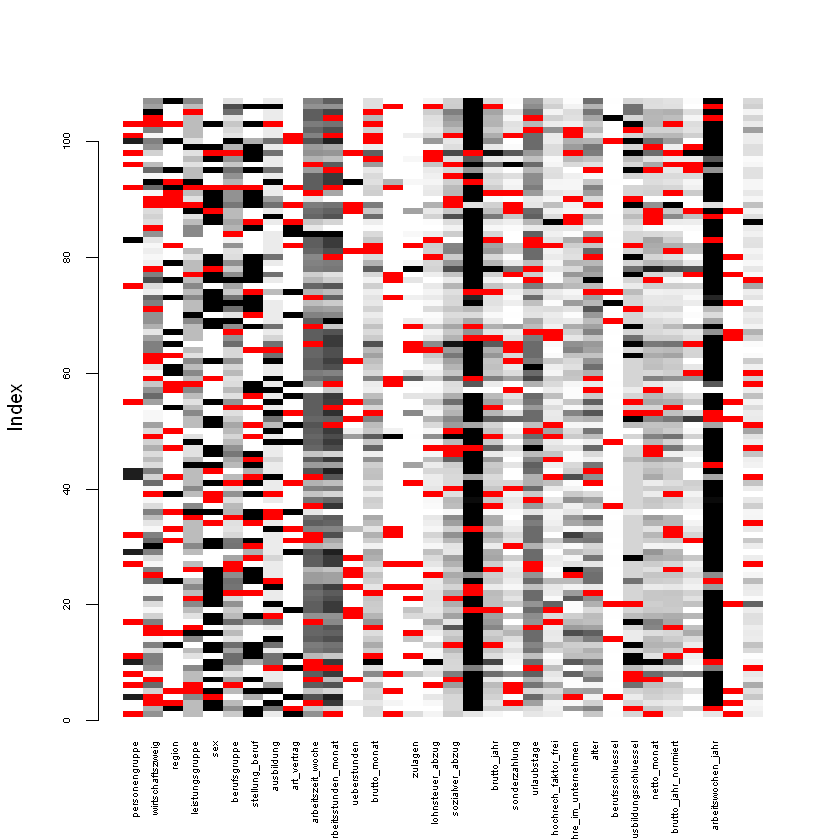

In [19]:
matrixplot(df.mcar, cex.axis = 0.5, interactive = F)

## MAR ##

In [ ]:
df_MAR <- produce_NA(df_1, mechanism="MAR", perc.missing = 0.1, by.patterns = F)

R_MAR <- ifelse(!is.na(df_MAR), 1, 0)

In [ ]:
df_MAR

personengruppe,wirtschaftszweig,region,leistungsgruppe,sex,berufsgruppe,stellung_beruf,ausbildung,art_vertrag,arbeitszeit_woche,⋯,jahre_im_unternehmen,alter,berufsschluessel,ausbildungsschluessel,netto_monat,brutto_jahr_normiert,sonderzahlung_normiert,arbeitswochen_jahr,arbeitswochen_geringbeschaeftigt,hochrech_faktor_gebunden
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
101,3,2,3,1,26,1,2,1,37,⋯,14,35,8,3,2704,62861,8699,51.43,0,1034.83
101,3,1,4,1,34,1,2,2,39,⋯,1,35,9,3,1690,34107,3236,51.43,0,1401.80
101,11,1,3,2,72,8,7,1,30,⋯,36,55,4,3,1634,25955,1028,51.43,0,4541.97
101,10,2,3,2,71,8,7,1,30,⋯,3,38,4,4,1481,25900,0,51.43,0,1015.51
101,2,1,4,2,25,1,1,2,35,⋯,1,39,8,2,1819,36909,5009,51.43,0,2974.35
101,2,2,2,1,24,1,2,1,36,⋯,15,38,7,3,2520,35958,3595,51.29,0,1443.36
101,10,1,3,1,71,8,4,1,25,⋯,18,44,4,4,1515,38630,4882,51.00,0,1860.17
101,11,1,3,2,71,1,4,1,40,⋯,20,54,3,4,3052,73021,12701,51.43,0,3612.65
101,2,2,3,2,29,1,2,1,38,⋯,5,28,3,3,1491,28345,2273,51.43,0,2198.00


In [ ]:
df.mar <- df_MAR$data.incomp
R.mar <- df_MAR$idx_newNA

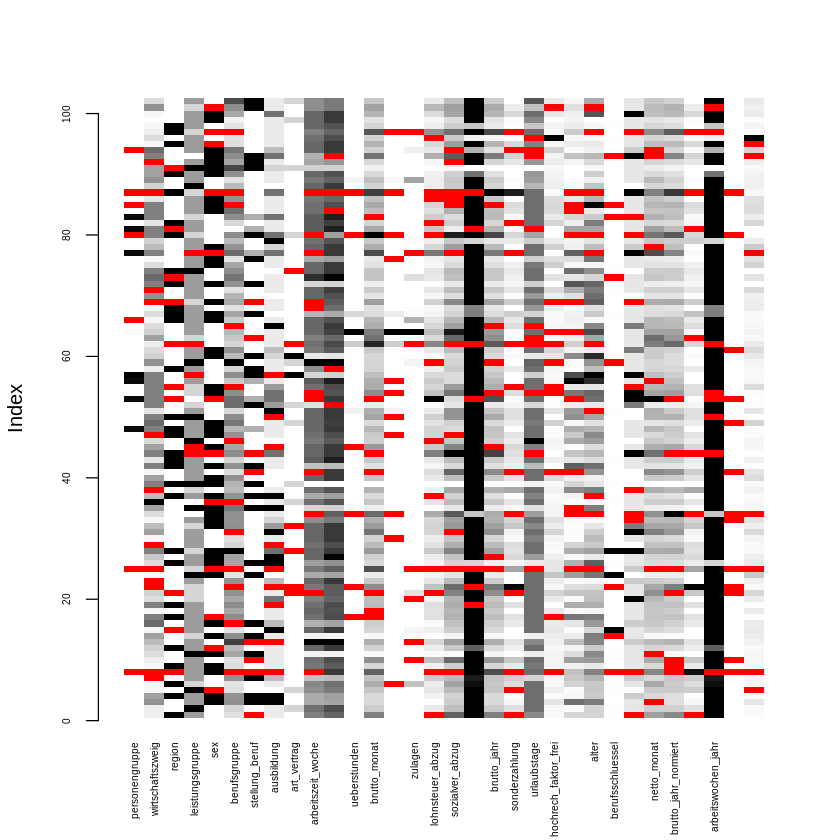

In [ ]:
matrixplot(df.mar, cex.axis = 0.5, interactive = F)

## MNAR (depending on missing values in the covariates) ##

In [ ]:
df_MNAR <- produce_NA(df_1, mechanism="MNAR", perc.missing = 0.1, by.patterns = F)

R_MNAR <- ifelse(!is.na(df_MNAR), 1, 0)

In [ ]:
df_MNAR

personengruppe,wirtschaftszweig,region,leistungsgruppe,sex,berufsgruppe,stellung_beruf,ausbildung,art_vertrag,arbeitszeit_woche,⋯,jahre_im_unternehmen,alter,berufsschluessel,ausbildungsschluessel,netto_monat,brutto_jahr_normiert,sonderzahlung_normiert,arbeitswochen_jahr,arbeitswochen_geringbeschaeftigt,hochrech_faktor_gebunden
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
101,3,2,3,1,26,1,2,1,37,⋯,14,35,8,3,2704,62861,8699,51.43,0,1034.83
101,3,1,4,1,34,1,2,2,39,⋯,1,35,9,3,1690,34107,3236,51.43,0,1401.80
101,11,1,3,2,72,8,7,1,30,⋯,36,55,4,3,1634,25955,1028,51.43,0,4541.97
101,10,2,3,2,71,8,7,1,30,⋯,3,38,4,4,1481,25900,0,51.43,0,1015.51
101,2,1,4,2,25,1,1,2,35,⋯,1,39,8,2,1819,36909,5009,51.43,0,2974.35
101,2,2,2,1,24,1,2,1,36,⋯,15,38,7,3,2520,35958,3595,51.29,0,1443.36
101,10,1,3,1,71,8,4,1,25,⋯,18,44,4,4,1515,38630,4882,51.00,0,1860.17
101,11,1,3,2,71,1,4,1,40,⋯,20,54,3,4,3052,73021,12701,51.43,0,3612.65
101,2,2,3,2,29,1,2,1,38,⋯,5,28,3,3,1491,28345,2273,51.43,0,2198.00


In [ ]:
df.mnar <- df_MNAR$data.incomp
R.mnar <- df_MNAR$idx_newNA

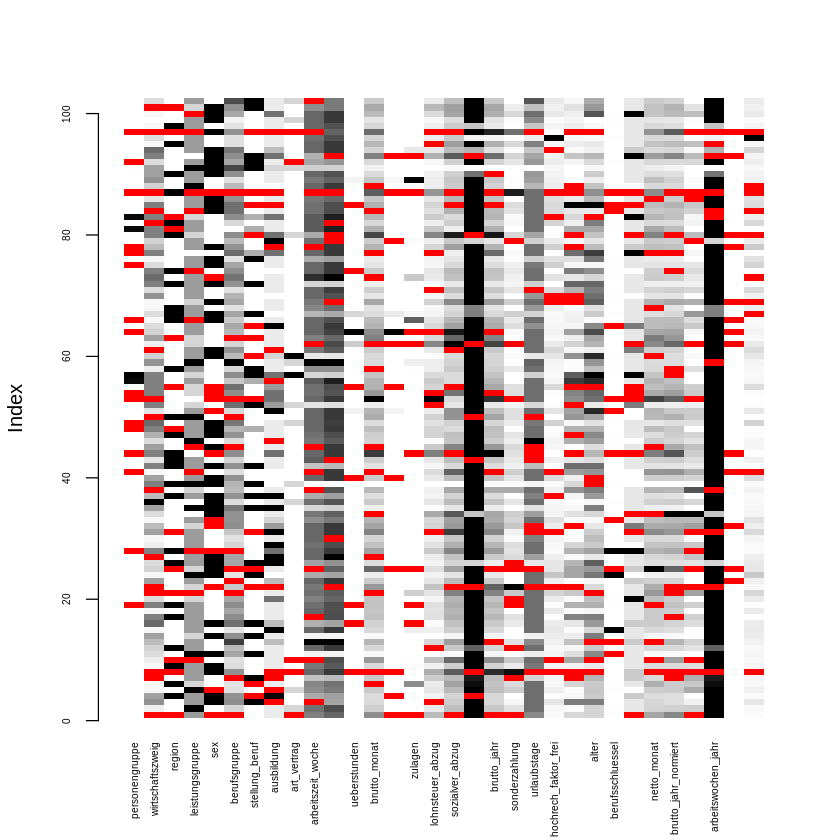

In [ ]:
matrixplot(df.mnar, cex.axis = 0.5, interactive = F)

## MNAR (depending on the observed values of the variable itself) ##


In [ ]:
df_MNAR_y <- produce_NA(df_1, mechanism="MNAR", perc.missing = 0.1, self.mask="sym", idx.incomplete = c(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))

R_MNAR_y <- ifelse(!is.na(df_MNAR_y), 1, 0)

In [ ]:
df_MNAR_y

personengruppe,wirtschaftszweig,region,leistungsgruppe,sex,berufsgruppe,stellung_beruf,ausbildung,art_vertrag,arbeitszeit_woche,⋯,jahre_im_unternehmen,alter,berufsschluessel,ausbildungsschluessel,netto_monat,brutto_jahr_normiert,sonderzahlung_normiert,arbeitswochen_jahr,arbeitswochen_geringbeschaeftigt,hochrech_faktor_gebunden
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
101,3,2,3,1,26,1,2,1,37,⋯,14,35,8,3,2704,62861,8699,51.43,0,1034.83
101,3,1,4,1,34,1,2,2,39,⋯,1,35,9,3,1690,34107,3236,51.43,0,1401.80
101,11,1,3,2,72,8,7,1,30,⋯,36,55,4,3,1634,25955,1028,51.43,0,4541.97
101,10,2,3,2,71,8,7,1,30,⋯,3,38,4,4,1481,25900,0,51.43,0,1015.51
101,2,1,4,2,25,1,1,2,35,⋯,1,39,8,2,1819,36909,5009,51.43,0,2974.35
101,2,2,2,1,24,1,2,1,36,⋯,15,38,7,3,2520,35958,3595,51.29,0,1443.36
101,10,1,3,1,71,8,4,1,25,⋯,18,44,4,4,1515,38630,4882,51.00,0,1860.17
101,11,1,3,2,71,1,4,1,40,⋯,20,54,3,4,3052,73021,12701,51.43,0,3612.65
101,2,2,3,2,29,1,2,1,38,⋯,5,28,3,3,1491,28345,2273,51.43,0,2198.00


In [ ]:
df.mnar_y <- df_MNAR_y$data.incomp
R.mnar_y <- df_MNAR_y$idx_newNA

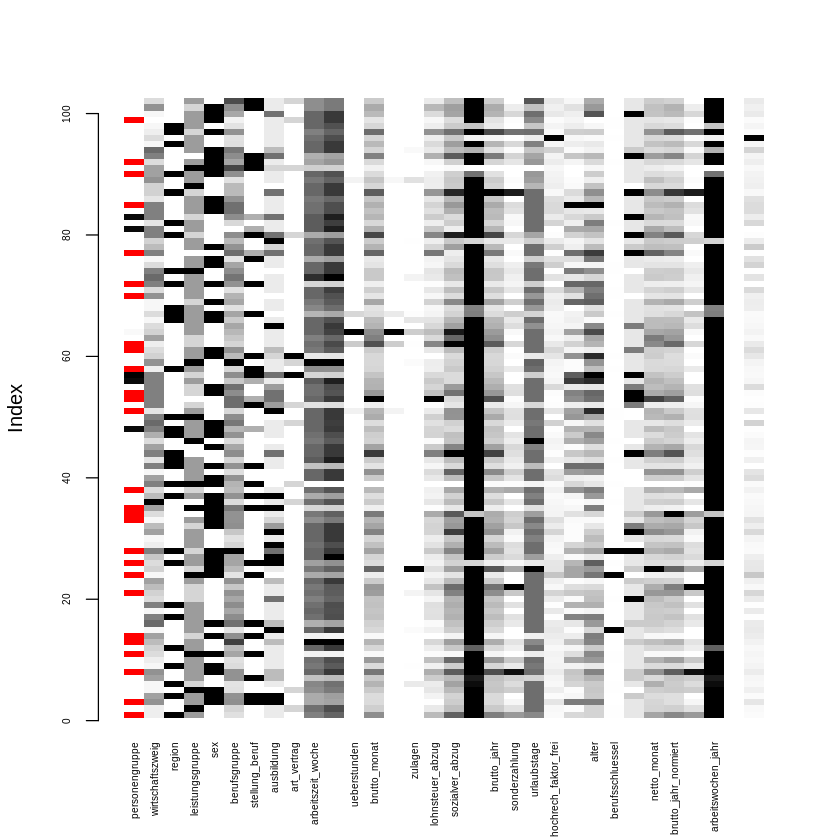

In [ ]:
matrixplot(df.mnar_y, cex.axis = 0.5, interactive = F)